# Assignment 4: Heartbeat Detection in ECG Signal using Cross-Correlation

- --> Detect a heartbeat within an ECG signal (attached) using the cross-correlation technique.
- --> Adding noise.
- --> Thresholding technique to refine the detection process.

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, find_peaks

### 1. Load the ECG Signal
- Load the provided ECG signal data into Python using pandas or numpy.
- Familiarize yourself with the data structure by plotting the entire ECG signal.

In [406]:
#Loading the signal using pandas 
signal = pd.read_csv(r"C:\Users\sofyc\OneDrive\Desktop\UPEC\Data capture and processing\assignment 4\sample.csv")
print(signal.shape)
signal.head()

(1001, 1)


,Sample Value
0,-0.001622
1,0.002459
2,0.000177
3,-0.015121
4,-0.038852


In [407]:
#Name of the column
signal.columns #there is a space, we can remove it

Index([' Sample Value'], dtype='object')

In [408]:
#Removing the space before the column's name
signal.columns = signal.columns.str.strip()
signal.columns #OK

Index(['Sample Value'], dtype='object')

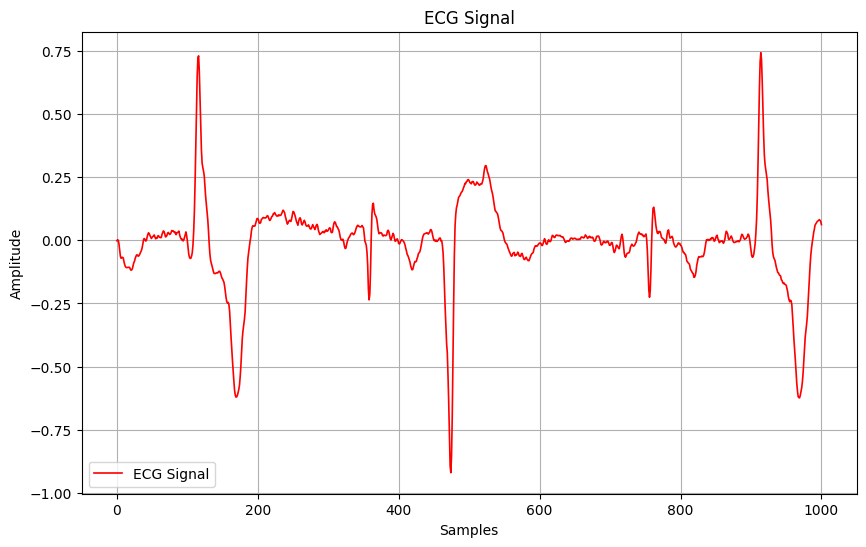

In [409]:
#Plot the entire ECG signal
plt.figure(figsize=(10,6))
plt.plot(signal['Sample Value'], label='ECG Signal', color='r', linewidth=1.2)
plt.title('ECG Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### 2. Extract the Heartbeat Template
- Isolate the segment between samples 400 and 600 as the heartbeat template.
- Plot this template to visualize the heartbeat section you will be detecting.

In [410]:
#Heartbeat template: samples between 400 and 600
template = signal[400:600]

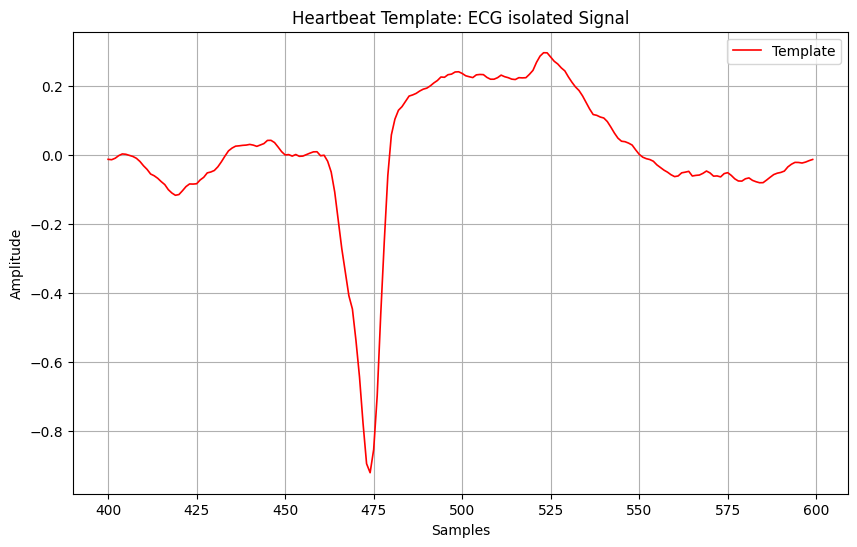

In [411]:
#Plot the isolated ECG signal, i.e. the template (NB PER ME: il battito cardiaco isolato è il Template)
plt.figure(figsize=(10,6))
plt.plot(template['Sample Value'], label='Template', color='r', linewidth=1.2)
plt.title('Heartbeat Template: ECG isolated Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### 3. Implement Cross-Correlation
- Write a function to calculate the cross-correlation between your template and the entire ECG signal using scipy.signal.correlate.
- Plot the cross-correlation result to locate peaks, which indicate potential heartbeat matches.

In [412]:
#Function to calculate the cross-correlation
def fun_cross_correlation(heart_template, ecg_signal):
    return correlate(heart_template, ecg_signal, mode='full')

In [413]:
#Computing the result
cross_correlation = fun_cross_correlation(template, signal)

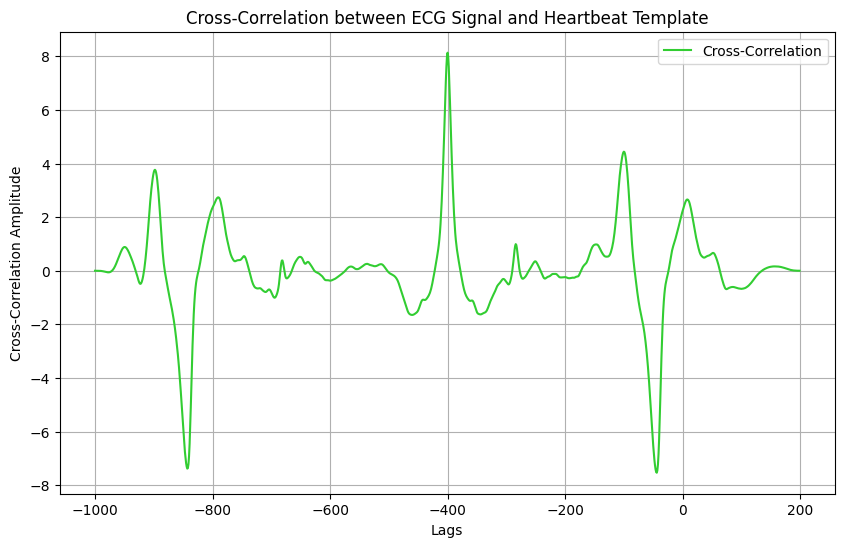

In [414]:
#To plot the cross-correlation we need to calculate the Lags, i.e. the temporal movements between the template and the ECG signal. 
#It's like passing / scrolling the template on the signal to see how they are aligned in each position (i.e. in each Sample).

lags = np.arange(-len(signal['Sample Value']) + 1, len(template))

#Plot
plt.figure(figsize=(10,6))
plt.plot(lags, cross_correlation, label='Cross-Correlation', color='limegreen')
plt.title('Cross-Correlation between ECG Signal and Heartbeat Template')
plt.xlabel('Lags')
plt.ylabel('Cross-Correlation Amplitude')
plt.legend()
plt.grid(True)
plt.show()
# I picchi nel grafico della cross-correlazione indicano le posizioni dei potenziali battiti cardiaci nel segnale. ITALIANO

### 4. Apply Thresholding for Detection
- Define a threshold level to filter out insignificant peaks in the cross-correlation result.
- Implement a peak detection algorithm that only identifies peaks exceeding this threshold.
- Adjust the threshold level based on your observations to optimize the balance between True Positives and False Positives.

In [415]:
#We define a threshold as the 30% of the maximum of the cross-correlation
threshold = 0.3 * np.max(cross_correlation)
threshold

2.4397039923168995

In [416]:
cross_correlation.shape

(1200, 1)

In [417]:
#Peak detection algorithm
cross_correlation = np.array(cross_correlation).flatten() #Transforming in 1D array 
peaks, _ = find_peaks(cross_correlation, height=threshold)

C:\Users\sofyc\AppData\Local\Temp\ipykernel_79812\1830986475.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(lags[peaks], cross_correlation[peaks], 'rx', label='Detected Peaks', color='red')  #Mark the peaks


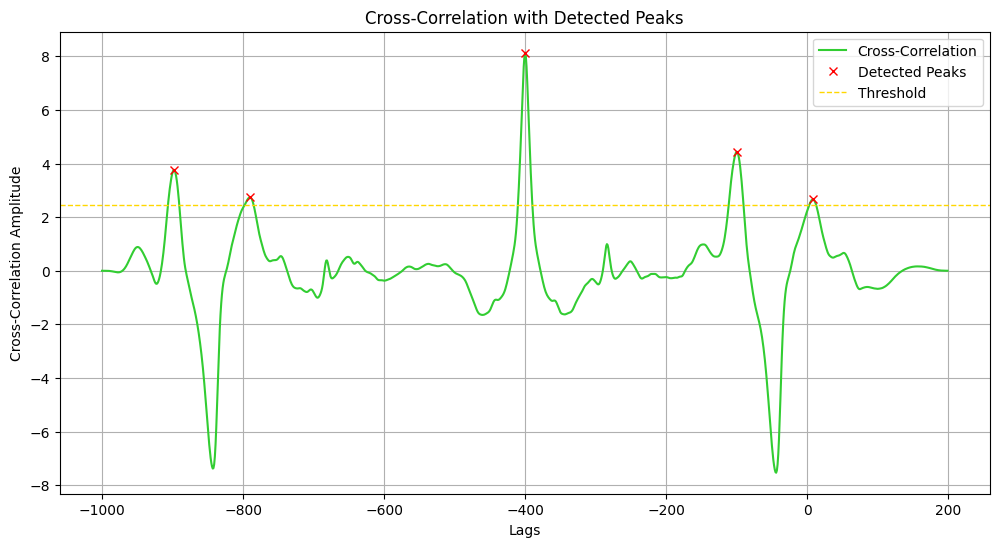

In [418]:
#Plot of the results
plt.figure(figsize=(12,6))
plt.plot(lags, cross_correlation, label='Cross-Correlation', color='limegreen')
plt.plot(lags[peaks], cross_correlation[peaks], 'rx', label='Detected Peaks', color='red')  #Mark the peaks
plt.axhline(y=threshold, color='gold', linestyle='--', label='Threshold', linewidth=1) #Threshold
plt.title('Cross-Correlation with Detected Peaks')
plt.xlabel('Lags')
plt.ylabel('Cross-Correlation Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### 5. Simulate Noise and Vary the SNR
- Implement a function to add Gaussian noise to the ECG signal, generating signals with different SNR levels (e.g., 10 dB, 20 dB, 30 dB).
- For each noisy signal, plot the waveform to observe the effects of noise.

In [419]:
#Function to add Gaussian noise to the ECG signal
def add_noise(signal, SNR_given):
    #Calculate the signal power
    signal_power = np.mean(signal**2)
    #Calculate noise power based on the desire SNR
    noise_power = signal_power / (10**(SNR_given/10))
    #Generating Gaussian noise N(mean=0, sd=sqrt(noise_power))
    noise_gauss = np.random.normal(0, np.sqrt(noise_power), signal.shape)
    #Return the signal with noise
    return(signal + noise_gauss)

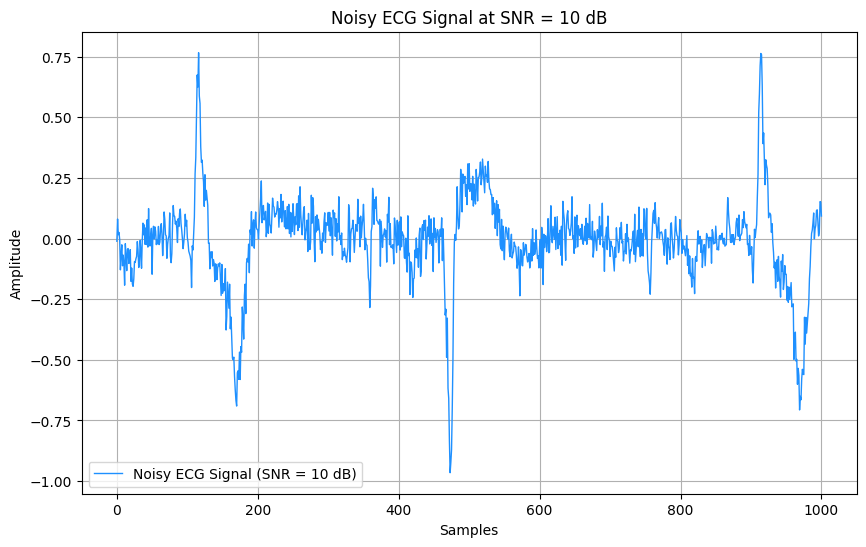

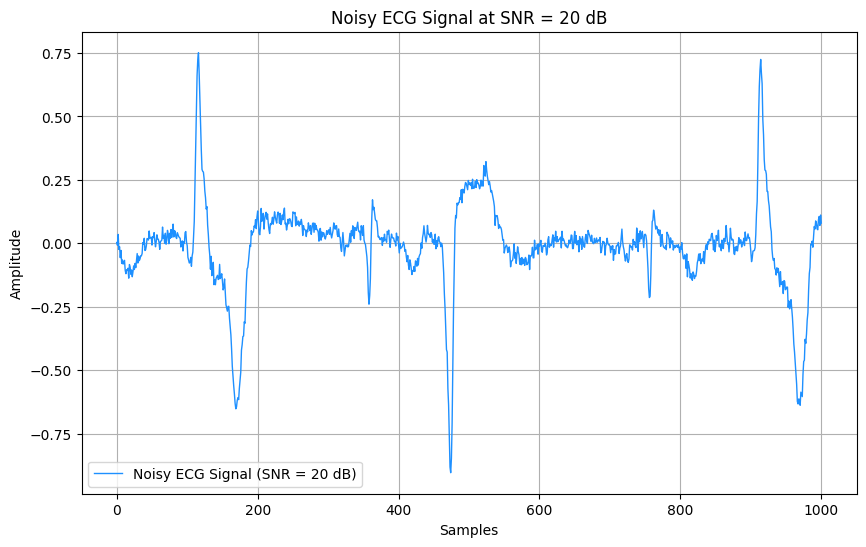

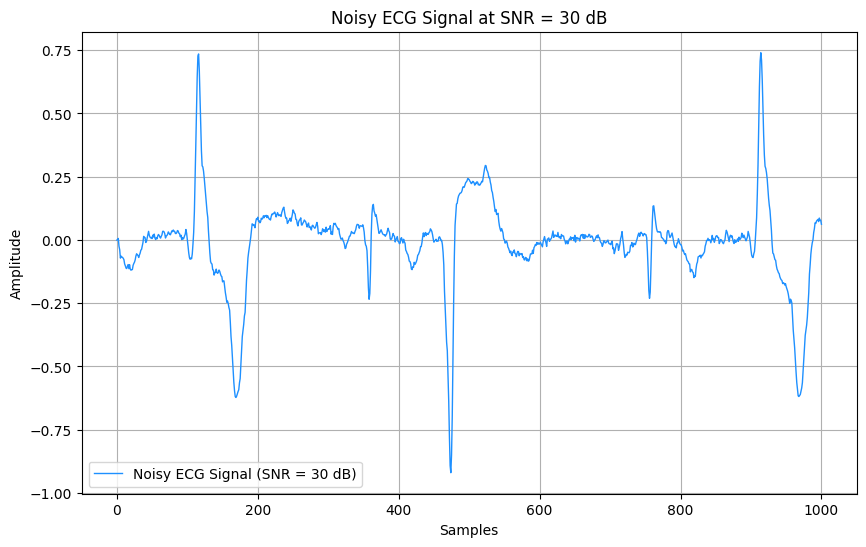

In [420]:
#SNR levels
SNR_levels = [10,20,30]

#Calculation and plot of signals with noise for each SNR level
for i in SNR_levels:
    noisy_signal = add_noise(signal['Sample Value'], i)
    plt.figure(figsize=(10, 6))
    plt.plot(noisy_signal, label=f'Noisy ECG Signal (SNR = {i} dB)', color='dodgerblue', linewidth=1)
    plt.title(f'Noisy ECG Signal at SNR = {i} dB')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()

### 6. Detect Heartbeat in Noisy Signals using Thresholding
- Apply your cross-correlation and thresholding functions to each noisy signal.
- Identify heartbeat locations based on peaks that exceed the threshold.
- Record the detection accuracy and note any missed or extra detections at each SNR level.

In [421]:
#Application of cross-correlation function and thresholding function
cross_corr_noisy_signals = []
threshold_noise = []
peaks_noise = []
lags_noise = []
true_positive_noise = []
false_positive_noise = []
false_negative_noise = []
accuracies_noise = []

#We calculate also precision and recall for the next point 7.
precision_noise = []
recall_noise = []

for i in SNR_levels:
    #Creating the signal with noise
    noisy_signal = add_noise(signal['Sample Value'], i)

    #Cross-correlation calculation for the noisy signal
    c = fun_cross_correlation(np.array(template).flatten(), noisy_signal)
    cross_corr_noisy_signals.append(c)

    #Threshold calculation
    t = 0.3 * np.max(c)
    threshold_noise.append(t)

    #Peaks detection
    p, _ = find_peaks(c, height=t)
    peaks_noise.append(p)

    #Calculation of lags
    l = np.arange(-len(noisy_signal) + 1, len(template))
    lags_noise.append(l)

    #True Positive, False Positive, False Negative calculation
    tp = len(set(peaks) & set(p)) #Correct detections 
    fp = len(set(p) - set(peaks)) #Extra detections
    fn = len(set(peaks) - set(p)) #Missing detections

    true_positive_noise.append(tp)
    false_positive_noise.append(fp)
    false_negative_noise.append(fn)

    #Accuracy calculation
    acc = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0
    accuracies_noise.append(acc)

    #Precision calculation
    pr = tp / (tp + fp) if (tp + fp) > 0 else 0
    precision_noise.append(pr)

    #Recall calculation
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0
    recall_noise.append(rec)

C:\Users\sofyc\AppData\Local\Temp\ipykernel_79812\845439346.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(lags[peaks], cross_corr[peaks], 'rx', label='Detected Peaks', color='red')  #Mark local peaks


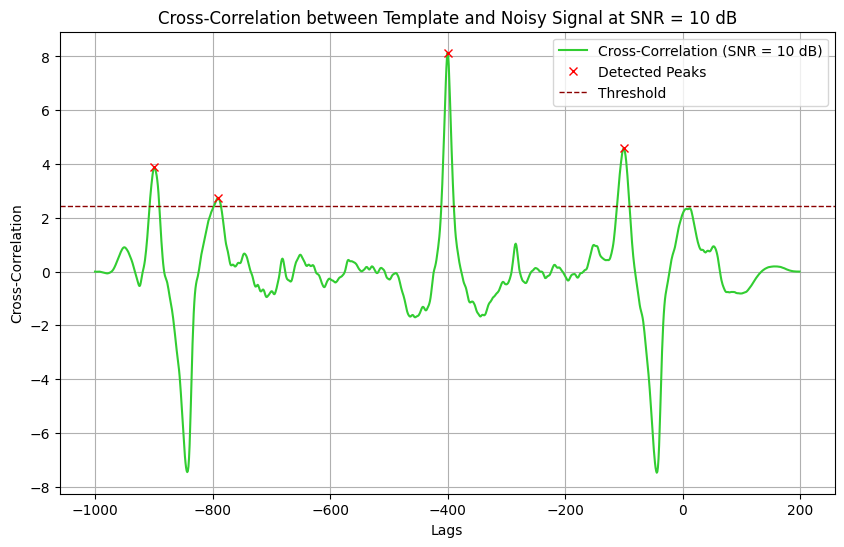

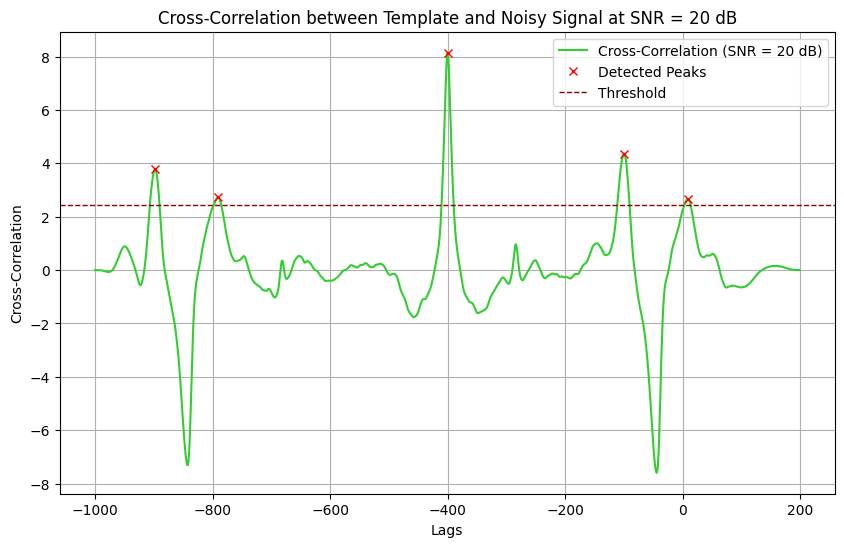

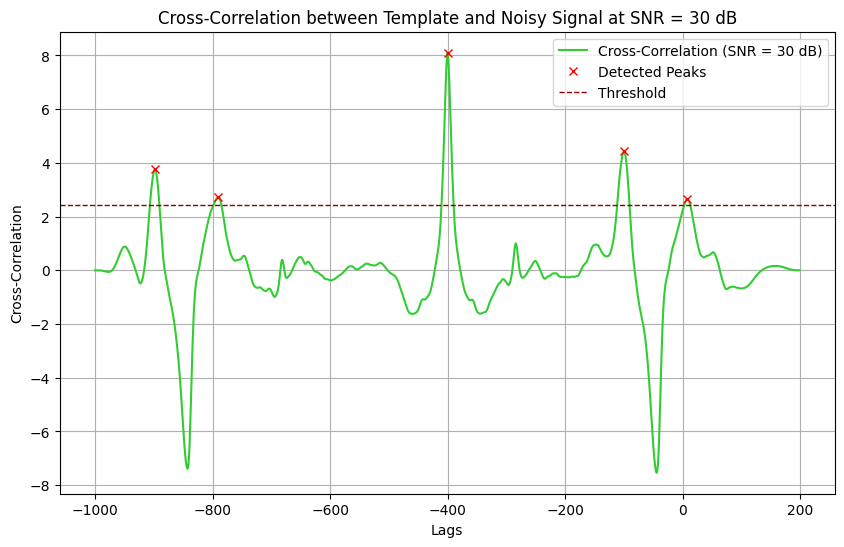

In [426]:
#Plot of results identifying the peaks that exceed the threshold
for i, (cross_corr, lags, peaks, threshold) in enumerate(zip(cross_corr_noisy_signals, lags_noise, peaks_noise, threshold_noise)):
    plt.figure(figsize=(10, 6))
    plt.plot(lags, cross_corr, label=f'Cross-Correlation (SNR = {SNR_levels[i]} dB)', color='limegreen')
    plt.plot(lags[peaks], cross_corr[peaks], 'rx', label='Detected Peaks', color='red')  #Mark local peaks
    plt.axhline(y=threshold, color='darkred', linestyle='--', label='Threshold', linewidth=1) #Local Threshold
    plt.title(f'Cross-Correlation between Template and Noisy Signal at SNR = {SNR_levels[i]} dB')
    plt.xlabel('Lags')
    plt.ylabel('Cross-Correlation')
    plt.legend()
    plt.grid(True)
    plt.show()

### 7. Analyze Detection Performance with Thresholding
Calculate performance metrics for each noise level:
- True Positives (TP): Correctly detected heartbeats above the threshold.
- False Positives (FP): Non-heartbeat detections that exceed the threshold.
- False Negatives (FN): Missed heartbeats below the threshold.
- Plot detection accuracy and other metrics against SNR levels to assess the effect of noise and thresholding on performance.

In [423]:
#We have already calcuated the results in point 6.
#Results table
res = {
    'SNR level': SNR_levels,
    'True positives': true_positive_noise,
    'False positives': false_positive_noise,
    'False negatives': false_negative_noise,
    'Accuracy': accuracies_noise,
    'Precision': precision_noise,
    'Recall': recall_noise
}
res_df = pd.DataFrame(res)
res_df

,SNR level,True positives,False positives,False negatives,Accuracy,Precision,Recall
0,10,2,2,3,0.285714,0.5,0.4
1,20,3,2,2,0.428571,0.6,0.6
2,30,5,0,0,1.000000,1.0,1.0


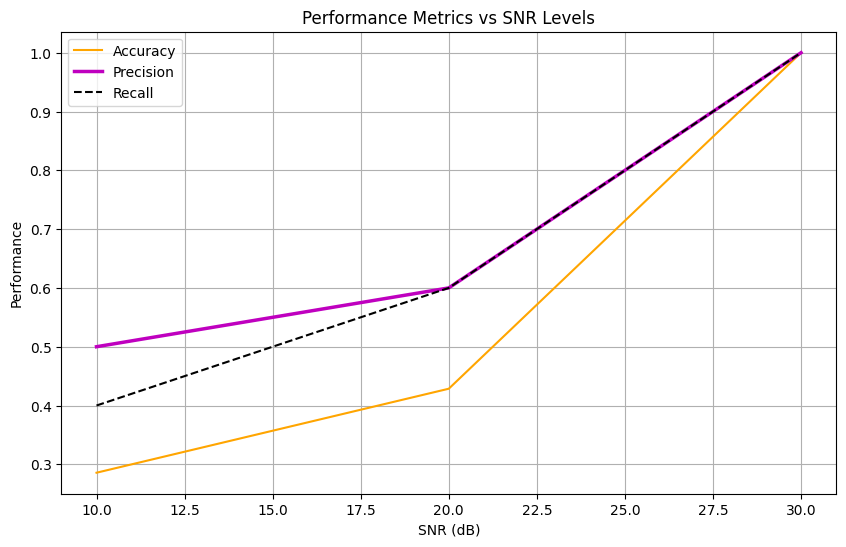

In [428]:
#Plot
plt.figure(figsize=(10, 6))
plt.plot(SNR_levels, accuracies_noise, label='Accuracy', color='orange')
plt.plot(SNR_levels, precision_noise, label='Precision', color='m', linewidth=2.5)
plt.plot(SNR_levels, recall_noise, label='Recall', linestyle='--', color='black', linewidth=1.5)
plt.title('Performance Metrics vs SNR Levels')
plt.xlabel('SNR (dB)')
plt.ylabel('Performance')
plt.legend()
plt.grid(True)
plt.show()